In [1]:
#import das libs
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:
#leitura dos dados
data = pd.read_csv("data/lithology.csv",';')

In [3]:
pd.set_option('display.float_format', str)
data.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.528,437641.96875,6470972.5,-469.50183110000006,19.480834961,-999.0,1.6114097834,1.7986813784,1.884185791,80.20085144,...,24.73569095158781,0.31484686817707136,0.15017183162707218,-0.0,-0.0,-0.0,0.0,0.0,6,68
1,494.68,437641.96875,6470972.5,-469.6538086,19.468799591,-999.0,1.6180702448,1.7956413031,1.8897935152,79.262886047,...,24.492376100271635,0.3185281394725607,0.1482686127827626,0.5277099599999815,-0.005607724200000108,0.9379653929999988,0.1519999999999868,-0.24331485131617114,6,68
2,494.832,437641.96875,6470972.5,-469.8057861,19.468799591,-999.0,1.6264585257,1.8007333279,1.8965227604,74.821998596,...,24.202298635769967,0.3229456493770365,0.13925763994167714,0.4298553499999969,-0.006729245199999846,4.440887450999995,0.1519999999999868,-0.29007746450166394,6,68
3,494.984,437641.96875,6470972.5,-469.9577942,19.459281921,-999.0,1.6215940714,1.8015166521,1.891912818,72.878921509,...,24.4007967435326,0.3199193863110002,0.1353149561758119,0.02418518000001768,0.004609942399999678,1.9430770870000058,0.15200000000004366,0.19849810776263155,6,68
4,495.136,437641.96875,6470972.5,-470.1097717,19.453100204000002,-999.0,1.6026790141999998,1.7952990532,1.8800340891,71.729141235,...,24.91676523082089,0.31212142368536505,0.13298194527730406,0.021087649999998348,0.01187872890000019,1.149780273999994,0.15199999999992994,0.5159684872882906,6,68


In [4]:
data.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded'],
      dtype='object')

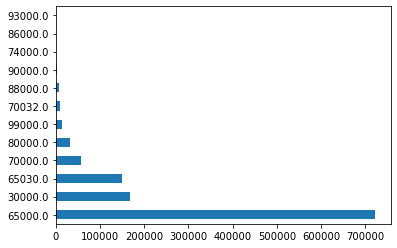

In [9]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts().plot(kind = 'barh')

In [10]:
#Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
#       'RHOB', '3GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
#      'MUDWEIGHT', 'RMIC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'Carbon_Index',
#       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
#       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
#       'FORMATION_encoded'],
#      dtype='object')

data.corr()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
DEPTH_MD,1.0,-0.0819037843543615,0.24974516491576274,-0.9878898931591696,0.24228656338536927,0.07296065036159242,0.05586354803696833,0.0628617203278668,0.26739935189164377,0.0982817786527117,...,0.2528012343190198,0.2671596692096795,0.04482983745861071,0.2159838368420734,0.26686816321778384,0.00043246587827933455,0.0024448354449094316,0.2668683902088381,0.056806771476690325,-0.2939979485870154
X_LOC,-0.0819037843543615,1.0,0.41687468666746946,0.08587702043883577,-0.24981936528219134,-0.16460831039987422,-0.04430307326710763,0.05477955767681561,0.09853280237323603,0.2311902145404378,...,0.09684980741467185,0.09848476648558123,0.167772977761011,-0.07124828963117748,0.09843513927705184,-0.0002873500444498307,0.0009737504954764436,0.09843402140853871,0.09492288758927875,-0.22515142676223737
Y_LOC,0.24974516491576274,0.41687468666746946,1.0,-0.25962317672858753,-0.14818102761524918,-0.17565026276121934,0.10994130109115977,0.009231210387407733,0.10605590416777923,0.20645338995155152,...,0.10234648041388915,0.10596477026027432,0.13175986690019229,0.04783152975035586,0.1058514761790346,-0.00018377625449477613,0.002193993329189411,0.10585100559979665,0.02458497044380584,-0.16386011903930378
Z_LOC,-0.9878898931591696,0.08587702043883577,-0.25962317672858753,1.0,-0.23439065254550676,-0.08860963160369764,-0.08783127668202087,-0.11100962309900536,-0.2774825875386866,-0.1015294315872954,...,-0.26297056442632444,-0.2772469553604718,-0.04370307322649287,-0.2083892426283952,-0.2769511501576265,-0.0004144602807345328,-0.0025092405617043803,-0.2769513006087813,-0.044176325108347334,0.29177146021238404
CALI,0.24228656338536927,-0.24981936528219134,-0.14818102761524918,-0.23439065254550676,1.0,0.23085889379498087,0.20018709661961548,0.059856055943407746,0.29062309233530914,-0.13147904369031696,...,0.2881042056973987,0.29059178845199957,-0.13320376621136276,0.3943635581436789,0.29046688299009865,0.000167157576187923,0.00033843543195942135,0.29046617868234137,0.05522716888534808,0.0174842766625057
RSHA,0.07296065036159242,-0.16460831039987422,-0.17565026276121934,-0.08860963160369764,0.23085889379498087,1.0,0.03844717173451164,0.04112158155378359,0.11386041808186012,-0.043931877476474104,...,0.11253708220824228,0.11391521752275138,-0.06352059552008768,0.08876003533306699,0.11381845142706905,-0.00039835798045296394,-0.0016634895071933875,0.11381955840614595,-0.011004380639581202,0.001706151252450675
RMED,0.05586354803696833,-0.04430307326710763,0.10994130109115977,-0.08783127668202087,0.20018709661961548,0.03844717173451164,1.0,0.0937799286613289,0.204209794362476,0.11714961148693707,...,0.2047815501149625,0.20421855011359874,0.08740552396817348,0.3507218766846578,0.20432837128854142,0.0012243742978346817,0.00017514012139802754,0.2043234415705519,-0.031007049948728983,-0.02234680058173094
RDEP,0.0628617203278668,0.05477955767681561,0.009231210387407733,-0.11100962309900536,0.059856055943407746,0.04112158155378359,0.0937799286613289,1.0,0.11398775712122694,0.009550229408864226,...,0.114446500795589,0.11399444392521939,0.003944188475401631,0.09066510010018941,0.11400300732222209,0.0006615446127881132,0.0003252315922464783,0.11400384981790701,0.045048147200426894,-0.00623900437755596
RHOB,0.26739935189164377,0.09853280237323603,0.10605590416777923,-0.2774825875386866,0.29062309233530914,0.11386041808186012,0.204209794362476,0.11398775712122694,1.0,-0.00258221919288915,...,0.9997273941497861,0.9999999008571071,-0.06267443912272554,0.46241796166920235,0.9995829120395333,0.00040763777724210393,0.000908408875253101,0.9995793328087291,0.02236078900636516,-0.12774900438153763
GR,0.0982817786527117,0.2311902145404378,0.20645338995155152,-0.1015294315872954,-0.13147904369031696,-0.043931877476474104,0.11714961148693707,0.009550229408864226,-0.00258221919288915,1.0,.

In [12]:
balanced = data

In [14]:
#classes

classes = [30000, 65030, 65000, 80000, 74000, 70000, 70032, 88000, 86000, 99000, 90000, 93000]

# Fazendo o mapeamento das classes para indexs e vice-versa
class_to_idx_map = {clazz: index for index, clazz in enumerate(classes)}
idx_to_class_map = {value: key for key, value in class_to_idx_map.items()}

# fazendo a substituição
y = balanced['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: class_to_idx_map[x])
y.value_counts()

2     720803
0     168937
1     150455
5      56320
3      33329
9      15245
6      10513
7       8213
10      3820
4       1688
8       1085
11       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [ ]:
#Tentativa de trabalhar com menos colunas para observar resultados

In [15]:
balanced = balanced.drop(['Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded','FORMATION_encoded'], axis=1)

In [16]:
# dados de entrada
X = balanced.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1)
X

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC
0,494.528,437641.96875,6470972.5,-469.50183110000006,19.480834961,-999.0,1.6114097834,1.7986813784,1.884185791,80.20085144,-999.0,20.915468216,161.13117981,24.612379074,17.5,34.63640976,1.9808349609999996,-0.574927628,-999.0,-999.0
1,494.68,437641.96875,6470972.5,-469.6538086,19.468799591,-999.0,1.6180702448,1.7956413031,1.8897935152,79.262886047,-999.0,19.383012772,160.60346985,23.895530701,17.5,34.63640976,1.968799591,-0.570188403,-999.0,-999.0
2,494.832,437641.96875,6470972.5,-469.8057861,19.468799591,-999.0,1.6264585257,1.8007333279,1.8965227604,74.821998596,-999.0,22.591518402,160.1736145,23.91635704,17.5,34.779556274,1.968799591,-0.574245155,-999.0,-999.0
3,494.984,437641.96875,6470972.5,-469.9577942,19.459281921,-999.0,1.6215940714,1.8015166521,1.891912818,72.878921509,-999.0,32.19190979,160.14942932,23.79368782,17.5,39.965164185,1.9592819209999988,-0.5863152739999999,-999.0,-999.0
4,495.136,437641.96875,6470972.5,-470.1097717,19.453100204000002,-999.0,1.6026790141999998,1.7952990532,1.8800340891,71.729141235,-999.0,38.495632172,160.12834167,24.104078293,17.5,57.48376464800001,1.9531002040000016,-0.597913623,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,444920.375,6421578.0,-999.0,8.423170089700001,-999.0,-999.0,-999.0,2.5279836655000003,77.654899597,-999.0,4.5864253044,68.5195165893704,-999.0,8.5,27.674367905,-0.07682991029999897,-0.0017632670000000004,-999.0,-999.0
1170507,3169.4644,444920.375,6421578.0,-999.0,8.3792438507,-999.0,-999.0,-999.0,2.537612915,75.363937378,-999.0,7.0198583603,67.48540215558926,-999.0,8.5,28.024337769000002,-0.12075614929999999,-0.007600012,-999.0,-999.0
1170508,3169.6164,444920.375,6421578.0,-999.0,8.3502483368,-999.0,-999.0,-999.0,2.4918599129,66.45284271199999,-999.0,9.0497817993,72.57998094569791,-999.0,8.5,28.091281890999998,-0.1497516632,-0.018296529,-999.0,-999.0
1170509,3169.7684,444920.375,6421578.0,-999.0,8.3137788773,-999.0,-999.0,-999.0,2.4475388527,55.784816742,-999.0,8.903917312599997,77.98174795803226,-999.0,8.5,28.019775391,-0.18622112269999924,-0.011437698,-999.0,-999.0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 20 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   DEPTH_MD   1170511 non-null  float64
 1   X_LOC      1170511 non-null  float64
 2   Y_LOC      1170511 non-null  float64
 3   Z_LOC      1170511 non-null  float64
 4   CALI       1170511 non-null  float64
 5   RSHA       1170511 non-null  float64
 6   RMED       1170511 non-null  float64
 7   RDEP       1170511 non-null  float64
 8   RHOB       1170511 non-null  float64
 9   GR         1170511 non-null  float64
 10  NPHI       1170511 non-null  float64
 11  PEF        1170511 non-null  float64
 12  DTC        1170511 non-null  float64
 13  SP         1170511 non-null  float64
 14  BS         1170511 non-null  float64
 15  ROP        1170511 non-null  float64
 16  DCAL       1170511 non-null  float64
 17  DRHO       1170511 non-null  float64
 18  MUDWEIGHT  1170511 non-null  float64
 19  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
"""
#REGRESSÃO LOGÍSTICA MULTICLASS (SOFTMAX REGRESSION)
"""

# RECEITA DE TREINAMENTO
# 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
# 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
# 3 - LOOP DE TREINAMENTO:
#     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
#     - BACKWARPASS: CALCULAR OS GRADIENTES
#     - ATUALIZAR OS PESOS

# CLASS DE REGRESSÃO LOGÍSTICA

class ModeloInicial(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        input_size = 20
        hidden_neurons = 120
        output_size = 12
        
        self.layer1 = nn.Linear(input_size, hidden_neurons)         
        self.layer2 = nn.Linear(hidden_neurons, hidden_neurons)
        self.saida = nn.Linear(hidden_neurons, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.saida(x)
        return x

# DEFINICIÇÃO DE MODELO
model = ModeloInicial()
model

ModeloInicial(
  (layer1): Linear(in_features=20, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=120, bias=True)
  (saida): Linear(in_features=120, out_features=12, bias=True)
)

Epoch: 0 Loss: 308267.4375
Epoch: 0 Loss: 1.2710024563602227e+18
Epoch: 0 Loss: 3377513.5
Epoch: 0 Loss: 115910.5859375
Epoch: 0 Loss: 26757.8125
Epoch: 0 Loss: 2.5287117958068848
Epoch: 0 Loss: 2.5214626789093018
Epoch: 0 Loss: 2.5194602012634277
Epoch: 0 Loss: 2.5130836963653564
Epoch: 0 Loss: 2.504783868789673
Epoch: 0 Loss: 2.504223585128784
Epoch: 0 Loss: 2.499861001968384
Epoch: 0 Loss: 2.495558500289917
Epoch: 0 Loss: 2.4905197620391846
Epoch: 0 Loss: 2.49058198928833
Epoch: 0 Loss: 2.48225998878479
Epoch: 0 Loss: 2.4821932315826416
Epoch: 0 Loss: 2.4754364490509033
Epoch: 0 Loss: 2.476261615753174
Epoch: 0 Loss: 2.4723546504974365
Epoch: 0 Loss: 2.4574568271636963
Epoch: 0 Loss: 2.4605579376220703
Epoch: 0 Loss: 2.4559948444366455
Epoch: 0 Loss: 2.4492077827453613
Epoch: 0 Loss: 2.4441232681274414
Epoch: 0 Loss: 2.4459798336029053
Epoch: 0 Loss: 2.4508635997772217
Epoch: 0 Loss: 2.4362142086029053
Epoch: 0 Loss: 2.4296562671661377
Epoch: 0 Loss: 2.426862955093384
Epoch: 0 Loss:

Epoch: 0 Loss: 1.6720550060272217
Epoch: 0 Loss: 1.6903897523880005
Epoch: 0 Loss: 1.7949512004852295
Epoch: 0 Loss: 1.6844196319580078
Epoch: 0 Loss: 1.7353805303573608
Epoch: 0 Loss: 1.7841761112213135
Epoch: 0 Loss: 1.7324851751327515
Epoch: 0 Loss: 1.7618448734283447
Epoch: 0 Loss: 1.6512597799301147
Epoch: 0 Loss: 1.7044821977615356
Epoch: 0 Loss: 1.7233233451843262
Epoch: 0 Loss: 1.6860668659210205
Epoch: 0 Loss: 1.7588081359863281
Epoch: 0 Loss: 1.6243987083435059
Epoch: 0 Loss: 1.7453179359436035
Epoch: 0 Loss: 1.718276023864746
Epoch: 0 Loss: 1.6666274070739746
Epoch: 0 Loss: 1.551628828048706
Epoch: 0 Loss: 1.705715298652649
Epoch: 0 Loss: 1.7567437887191772
Epoch: 0 Loss: 1.6230334043502808
Epoch: 0 Loss: 1.7333898544311523
Epoch: 0 Loss: 1.6527396440505981
Epoch: 0 Loss: 1.7603514194488525
Epoch: 0 Loss: 1.7331256866455078
Epoch: 0 Loss: 1.66067636013031
Epoch: 0 Loss: 1.7611807584762573
Epoch: 0 Loss: 1.7231504917144775
Epoch: 0 Loss: 1.7866325378417969
Epoch: 0 Loss: 1.72

Epoch: 0 Loss: 1.3005210161209106
Epoch: 0 Loss: 1.4189088344573975
Epoch: 0 Loss: 1.3725271224975586
Epoch: 0 Loss: 1.3210437297821045
Epoch: 0 Loss: 1.388196349143982
Epoch: 0 Loss: 1.467329978942871
Epoch: 0 Loss: 1.4507999420166016
Epoch: 0 Loss: 1.3519554138183594
Epoch: 0 Loss: 1.4219602346420288
Epoch: 0 Loss: 1.2965244054794312
Epoch: 0 Loss: 1.4754116535186768
Epoch: 0 Loss: 1.5188755989074707
Epoch: 0 Loss: 1.4000904560089111
Epoch: 0 Loss: 1.432032585144043
Epoch: 0 Loss: 1.4858498573303223
Epoch: 0 Loss: 1.5719460248947144
Epoch: 0 Loss: 1.4886696338653564
Epoch: 0 Loss: 1.290887713432312
Epoch: 0 Loss: 1.4876697063446045
Epoch: 0 Loss: 1.5516951084136963
Epoch: 0 Loss: 1.3649003505706787
Epoch: 0 Loss: 1.4069982767105103
Epoch: 0 Loss: 1.5790672302246094
Epoch: 0 Loss: 1.6562550067901611
Epoch: 0 Loss: 1.5235645771026611
Epoch: 0 Loss: 1.5248737335205078
Epoch: 0 Loss: 1.3413488864898682
Epoch: 0 Loss: 1.6645417213439941
Epoch: 0 Loss: 1.487138032913208
Epoch: 0 Loss: 1.30

Epoch: 0 Loss: 1.396416187286377
Epoch: 0 Loss: 1.2613455057144165
Epoch: 0 Loss: 1.4035531282424927
Epoch: 0 Loss: 1.3042795658111572
Epoch: 0 Loss: 1.1639302968978882
Epoch: 0 Loss: 1.3487670421600342
Epoch: 0 Loss: 1.4188462495803833
Epoch: 0 Loss: 1.343000888824463
Epoch: 0 Loss: 1.3995659351348877
Epoch: 0 Loss: 1.4008944034576416
Epoch: 0 Loss: 1.1029764413833618
Epoch: 0 Loss: 1.3549262285232544
Epoch: 0 Loss: 1.3706386089324951
Epoch: 0 Loss: 1.3363642692565918
Epoch: 0 Loss: 1.209567666053772
Epoch: 0 Loss: 1.4823155403137207
Epoch: 0 Loss: 1.2819160223007202
Epoch: 0 Loss: 1.4999171495437622
Epoch: 0 Loss: 1.411108136177063
Epoch: 0 Loss: 1.4322822093963623
Epoch: 0 Loss: 1.499505639076233
Epoch: 0 Loss: 1.230118751525879
Epoch: 0 Loss: 1.2967681884765625
Epoch: 0 Loss: 1.4358099699020386
Epoch: 0 Loss: 1.1993783712387085
Epoch: 0 Loss: 1.1959627866744995
Epoch: 0 Loss: 1.2969441413879395
Epoch: 0 Loss: 1.371392846107483
Epoch: 0 Loss: 1.2643322944641113
Epoch: 0 Loss: 1.3546

Epoch: 0 Loss: 1.272868275642395
Epoch: 0 Loss: 1.2873104810714722
Epoch: 0 Loss: 1.2925935983657837
Epoch: 0 Loss: 1.4409725666046143
Epoch: 0 Loss: 1.0364887714385986
Epoch: 0 Loss: 1.5138782262802124
Epoch: 0 Loss: 1.289287805557251
Epoch: 0 Loss: 1.214503526687622
Epoch: 0 Loss: 1.4202100038528442
Epoch: 0 Loss: 1.2525336742401123
Epoch: 0 Loss: 1.373223900794983
Epoch: 0 Loss: 1.260745882987976
Epoch: 0 Loss: 1.2533210515975952
Epoch: 0 Loss: 1.1649054288864136
Epoch: 0 Loss: 1.1925443410873413
Epoch: 0 Loss: 1.5123810768127441
Epoch: 0 Loss: 1.511922836303711
Epoch: 0 Loss: 1.2553813457489014
Epoch: 0 Loss: 1.409589409828186
Epoch: 0 Loss: 1.2136693000793457
Epoch: 0 Loss: 1.1907908916473389
Epoch: 0 Loss: 1.2679164409637451
Epoch: 0 Loss: 1.2628225088119507
Epoch: 0 Loss: 1.369156002998352
Epoch: 0 Loss: 1.4135515689849854
Epoch: 0 Loss: 1.4087733030319214
Epoch: 0 Loss: 1.3627504110336304
Epoch: 0 Loss: 1.3622827529907227
Epoch: 0 Loss: 1.372633457183838
Epoch: 0 Loss: 1.248894

Epoch: 0 Loss: 1.4251691102981567
Epoch: 0 Loss: 1.2772212028503418
Epoch: 0 Loss: 1.2579785585403442
Epoch: 0 Loss: 1.4755007028579712
Epoch: 0 Loss: 1.1891614198684692
Epoch: 0 Loss: 1.4428280591964722
Epoch: 0 Loss: 1.2530596256256104
Epoch: 0 Loss: 1.3046314716339111
Epoch: 0 Loss: 1.3054007291793823
Epoch: 0 Loss: 1.1325188875198364
Epoch: 0 Loss: 1.292114019393921
Epoch: 0 Loss: 1.288221001625061
Epoch: 0 Loss: 1.330403447151184
Epoch: 0 Loss: 1.2461059093475342
Epoch: 0 Loss: 1.2357257604599
Epoch: 0 Loss: 1.3776419162750244
Epoch: 0 Loss: 1.313791036605835
Epoch: 0 Loss: 1.3850512504577637
Epoch: 0 Loss: 1.127388596534729
Epoch: 0 Loss: 1.2417699098587036
Epoch: 0 Loss: 1.3017170429229736
Epoch: 0 Loss: 1.287959098815918
Epoch: 0 Loss: 1.3640836477279663
Epoch: 0 Loss: 1.4223699569702148
Epoch: 0 Loss: 1.3756341934204102
Epoch: 0 Loss: 1.2459437847137451
Epoch: 0 Loss: 1.3398865461349487
Epoch: 0 Loss: 1.1375735998153687
Epoch: 0 Loss: 1.262658715248108
Epoch: 0 Loss: 1.3245601

Epoch: 0 Loss: 1.317450761795044
Epoch: 0 Loss: 1.4500824213027954
Epoch: 0 Loss: 1.1417152881622314
Epoch: 0 Loss: 1.3241419792175293
Epoch: 0 Loss: 1.3585397005081177
Epoch: 0 Loss: 1.1905951499938965
Epoch: 0 Loss: 1.2915799617767334
Epoch: 0 Loss: 1.4172075986862183
Epoch: 0 Loss: 1.3789085149765015
Epoch: 0 Loss: 1.180972933769226
Epoch: 0 Loss: 1.244917631149292
Epoch: 0 Loss: 1.2166776657104492
Epoch: 0 Loss: 1.2764573097229004
Epoch: 0 Loss: 1.2694339752197266
Epoch: 0 Loss: 1.2344942092895508
Epoch: 0 Loss: 1.3363431692123413
Epoch: 0 Loss: 1.370147466659546
Epoch: 0 Loss: 1.3563342094421387
Epoch: 0 Loss: 1.202855110168457
Epoch: 0 Loss: 1.3657445907592773
Epoch: 0 Loss: 1.4055671691894531
Epoch: 0 Loss: 1.244818091392517
Epoch: 0 Loss: 1.3439216613769531
Epoch: 0 Loss: 1.26902174949646
Epoch: 0 Loss: 1.245294451713562
Epoch: 0 Loss: 1.3308292627334595
Epoch: 0 Loss: 1.50253164768219
Epoch: 0 Loss: 1.3135727643966675
Epoch: 0 Loss: 1.3941798210144043
Epoch: 0 Loss: 1.13551175

Epoch: 0 Loss: 1.4004493951797485
Epoch: 0 Loss: 1.1930147409439087
Epoch: 0 Loss: 1.1660053730010986
Epoch: 0 Loss: 1.2077674865722656
Epoch: 0 Loss: 1.2473560571670532
Epoch: 0 Loss: 1.3139139413833618
Epoch: 0 Loss: 1.3266582489013672
Epoch: 0 Loss: 1.4235877990722656
Epoch: 0 Loss: 1.2505700588226318
Epoch: 0 Loss: 1.3155126571655273
Epoch: 0 Loss: 1.2426403760910034
Epoch: 0 Loss: 1.2914142608642578
Epoch: 0 Loss: 1.3514103889465332
Epoch: 0 Loss: 1.2926325798034668
Epoch: 0 Loss: 1.3783482313156128
Epoch: 0 Loss: 1.3348205089569092
Epoch: 0 Loss: 1.1031419038772583
Epoch: 0 Loss: 1.3555958271026611
Epoch: 0 Loss: 1.2456507682800293
Epoch: 0 Loss: 1.3964554071426392
Epoch: 0 Loss: 1.4152597188949585
Epoch: 0 Loss: 1.358360767364502
Epoch: 0 Loss: 1.1958285570144653
Epoch: 0 Loss: 1.3665035963058472
Epoch: 0 Loss: 1.2944823503494263
Epoch: 0 Loss: 1.3515243530273438
Epoch: 0 Loss: 1.2518607378005981
Epoch: 0 Loss: 1.2625813484191895
Epoch: 0 Loss: 1.2839773893356323
Epoch: 0 Loss: 

Epoch: 0 Loss: 1.241555094718933
Epoch: 0 Loss: 1.2895888090133667
Epoch: 0 Loss: 1.4229390621185303
Epoch: 0 Loss: 1.3810205459594727
Epoch: 0 Loss: 1.327934741973877
Epoch: 0 Loss: 1.2399990558624268
Epoch: 0 Loss: 1.4328651428222656
Epoch: 0 Loss: 1.2233846187591553
Epoch: 0 Loss: 1.2240897417068481
Epoch: 0 Loss: 1.2867177724838257
Epoch: 0 Loss: 1.4272838830947876
Epoch: 0 Loss: 1.3394988775253296
Epoch: 0 Loss: 1.234708547592163
Epoch: 0 Loss: 1.3460328578948975
Epoch: 0 Loss: 1.4301531314849854
Epoch: 0 Loss: 1.3727459907531738
Epoch: 0 Loss: 1.3048045635223389
Epoch: 0 Loss: 1.3262468576431274
Epoch: 0 Loss: 1.3397296667099
Epoch: 0 Loss: 1.2823597192764282
Epoch: 0 Loss: 1.1320093870162964
Epoch: 0 Loss: 1.4143586158752441
Epoch: 0 Loss: 1.3402700424194336
Epoch: 0 Loss: 1.4004082679748535
Epoch: 0 Loss: 1.4018266201019287
Epoch: 0 Loss: 1.2367591857910156
Epoch: 0 Loss: 1.114256739616394
Epoch: 0 Loss: 1.2759276628494263
Epoch: 0 Loss: 1.3808180093765259
Epoch: 0 Loss: 1.3097

Epoch: 0 Loss: 1.1287379264831543
Epoch: 0 Loss: 1.371800184249878
Epoch: 0 Loss: 1.2008262872695923
Epoch: 0 Loss: 1.1661434173583984
Epoch: 0 Loss: 1.1167560815811157
Epoch: 0 Loss: 1.1963061094284058
Epoch: 0 Loss: 1.1928383111953735
Epoch: 0 Loss: 1.1372486352920532
Epoch: 0 Loss: 1.1149227619171143
Epoch: 0 Loss: 1.3370821475982666
Epoch: 0 Loss: 1.1876544952392578
Epoch: 0 Loss: 1.3016611337661743
Epoch: 0 Loss: 1.3098138570785522
Epoch: 0 Loss: 1.263793706893921
Epoch: 0 Loss: 1.3165770769119263
Epoch: 0 Loss: 1.4360512495040894
Epoch: 0 Loss: 1.553029179573059
Epoch: 0 Loss: 1.297676920890808
Epoch: 0 Loss: 1.2136330604553223
Epoch: 0 Loss: 1.1680742502212524
Epoch: 0 Loss: 1.2229876518249512
Epoch: 0 Loss: 1.297086477279663
Epoch: 0 Loss: 1.0965923070907593
Epoch: 0 Loss: 1.1548165082931519
Epoch: 0 Loss: 1.314177393913269
Epoch: 0 Loss: 1.2822520732879639
Epoch: 0 Loss: 1.1923325061798096
Epoch: 0 Loss: 1.228816032409668
Epoch: 0 Loss: 1.255899429321289
Epoch: 0 Loss: 1.21478

Epoch: 0 Loss: 1.371535301208496
Epoch: 0 Loss: 1.2033329010009766
Epoch: 0 Loss: 1.2519067525863647
Epoch: 0 Loss: 1.3282248973846436
Epoch: 0 Loss: 1.5624970197677612
Epoch: 0 Loss: 1.178501009941101
Epoch: 0 Loss: 1.3458629846572876
Epoch: 0 Loss: 1.4123598337173462
Epoch: 0 Loss: 1.287623643875122
Epoch: 0 Loss: 1.2291258573532104
Epoch: 0 Loss: 1.1490144729614258
Epoch: 0 Loss: 1.1201813220977783
Epoch: 0 Loss: 1.1463793516159058
Epoch: 0 Loss: 1.2418971061706543
Epoch: 0 Loss: 1.2773734331130981
Epoch: 0 Loss: 1.1937215328216553
Epoch: 0 Loss: 1.3034404516220093
Epoch: 0 Loss: 1.306066870689392
Epoch: 0 Loss: 1.2518230676651
Epoch: 0 Loss: 1.175033688545227
Epoch: 0 Loss: 1.4240306615829468
Epoch: 0 Loss: 1.1560964584350586
Epoch: 0 Loss: 1.1511849164962769
Epoch: 0 Loss: 1.309739351272583
Epoch: 0 Loss: 1.1899083852767944
Epoch: 0 Loss: 1.4024709463119507
Epoch: 0 Loss: 1.185036540031433
Epoch: 0 Loss: 1.1904282569885254
Epoch: 0 Loss: 1.1994622945785522
Epoch: 0 Loss: 1.2031326

Epoch: 0 Loss: 1.256758213043213
Epoch: 0 Loss: 1.2967898845672607
Epoch: 0 Loss: 1.5182156562805176
Epoch: 0 Loss: 1.4740920066833496
Epoch: 0 Loss: 1.205015778541565
Epoch: 0 Loss: 1.207836627960205
Epoch: 0 Loss: 1.3001232147216797
Epoch: 0 Loss: 1.323512077331543
Epoch: 0 Loss: 1.2620429992675781
Epoch: 0 Loss: 1.3254749774932861
Epoch: 0 Loss: 1.3414891958236694
Epoch: 0 Loss: 1.3604235649108887
Epoch: 0 Loss: 1.1805157661437988
Epoch: 0 Loss: 1.3466668128967285
Epoch: 0 Loss: 1.3510602712631226
Epoch: 0 Loss: 1.216866135597229
Epoch: 0 Loss: 1.3586348295211792
Epoch: 0 Loss: 1.4166765213012695
Epoch: 0 Loss: 1.2639274597167969
Epoch: 0 Loss: 1.3180222511291504
Epoch: 0 Loss: 1.1364872455596924
Epoch: 0 Loss: 1.3206219673156738
Epoch: 0 Loss: 1.2812840938568115
Epoch: 0 Loss: 1.3173454999923706
Epoch: 0 Loss: 1.246721625328064
Epoch: 0 Loss: 1.1945369243621826
Epoch: 0 Loss: 1.177978754043579
Epoch: 0 Loss: 1.303897500038147
Epoch: 0 Loss: 1.3239641189575195
Epoch: 0 Loss: 1.29704

Epoch: 0 Loss: 1.3203622102737427
Epoch: 0 Loss: 1.2394179105758667
Epoch: 0 Loss: 1.2712957859039307
Epoch: 0 Loss: 1.2597463130950928
Epoch: 0 Loss: 1.2470306158065796
Epoch: 0 Loss: 1.237303376197815
Epoch: 0 Loss: 1.3410758972167969
Epoch: 0 Loss: 1.303227424621582
Epoch: 0 Loss: 1.2257723808288574
Epoch: 0 Loss: 1.2198079824447632
Epoch: 0 Loss: 1.4813604354858398
Epoch: 0 Loss: 1.3564444780349731
Epoch: 0 Loss: 1.3033442497253418
Epoch: 0 Loss: 1.1969741582870483
Epoch: 0 Loss: 1.3382731676101685
Epoch: 0 Loss: 1.1704838275909424
Epoch: 98 Loss: 1.16741144657135
Epoch: 98 Loss: 1.06992769241333
Epoch: 98 Loss: 1.4449354410171509
Epoch: 98 Loss: 1.4614481925964355
Epoch: 98 Loss: 1.3315702676773071
Epoch: 98 Loss: 1.3685585260391235
Epoch: 98 Loss: 1.2336971759796143
Epoch: 98 Loss: 1.3567134141921997
Epoch: 98 Loss: 1.3143151998519897
Epoch: 98 Loss: 1.1713392734527588
Epoch: 98 Loss: 1.1838725805282593
Epoch: 98 Loss: 1.1996562480926514
Epoch: 98 Loss: 1.1714318990707397
Epoch: 

Epoch: 98 Loss: 1.4206559658050537
Epoch: 98 Loss: 1.519882321357727
Epoch: 98 Loss: 1.297554612159729
Epoch: 98 Loss: 1.2008527517318726
Epoch: 98 Loss: 1.154304027557373
Epoch: 98 Loss: 1.2112934589385986
Epoch: 98 Loss: 1.2775856256484985
Epoch: 98 Loss: 1.0864763259887695
Epoch: 98 Loss: 1.1452112197875977
Epoch: 98 Loss: 1.298545479774475
Epoch: 98 Loss: 1.2834982872009277
Epoch: 98 Loss: 1.1764061450958252
Epoch: 98 Loss: 1.2195501327514648
Epoch: 98 Loss: 1.2375366687774658
Epoch: 98 Loss: 1.20285964012146
Epoch: 98 Loss: 1.332783818244934
Epoch: 98 Loss: 1.2326297760009766
Epoch: 98 Loss: 1.097885012626648
Epoch: 98 Loss: 1.2865313291549683
Epoch: 98 Loss: 1.2885520458221436
Epoch: 98 Loss: 1.0906425714492798
Epoch: 98 Loss: 1.1619970798492432
Epoch: 98 Loss: 1.2067285776138306
Epoch: 98 Loss: 1.1670583486557007
Epoch: 98 Loss: 1.2630435228347778
Epoch: 98 Loss: 1.1078460216522217
Epoch: 98 Loss: 1.2545353174209595
Epoch: 98 Loss: 1.2063593864440918
Epoch: 98 Loss: 1.1976761817

Epoch: 98 Loss: 1.1653417348861694
Epoch: 98 Loss: 1.1736410856246948
Epoch: 98 Loss: 1.1765550374984741
Epoch: 98 Loss: 1.1875637769699097
Epoch: 98 Loss: 1.1674367189407349
Epoch: 98 Loss: 1.1719107627868652
Epoch: 98 Loss: 1.2253220081329346
Epoch: 98 Loss: 1.177686095237732
Epoch: 98 Loss: 1.1727758646011353
Epoch: 98 Loss: 1.3392229080200195
Epoch: 98 Loss: 1.204013705253601
Epoch: 98 Loss: 1.1988598108291626
Epoch: 98 Loss: 1.2533940076828003
Epoch: 98 Loss: 1.2329699993133545
Epoch: 98 Loss: 1.481278419494629
Epoch: 98 Loss: 1.3020849227905273
Epoch: 98 Loss: 1.2698779106140137
Epoch: 98 Loss: 1.212129831314087
Epoch: 98 Loss: 1.2918468713760376
Epoch: 98 Loss: 1.3820031881332397
Epoch: 98 Loss: 1.122020959854126
Epoch: 98 Loss: 1.3304201364517212
Epoch: 98 Loss: 1.1041135787963867
Epoch: 98 Loss: 1.2455917596817017
Epoch: 98 Loss: 1.2268507480621338
Epoch: 98 Loss: 1.1083685159683228
Epoch: 98 Loss: 1.195717453956604
Epoch: 98 Loss: 1.4333477020263672
Epoch: 98 Loss: 1.13261723

Epoch: 98 Loss: 1.121277093887329
Epoch: 98 Loss: 1.30413019657135
Epoch: 98 Loss: 1.28065824508667
Epoch: 98 Loss: 1.2987611293792725
Epoch: 98 Loss: 1.245965600013733
Epoch: 98 Loss: 1.1818957328796387
Epoch: 98 Loss: 1.16974937915802
Epoch: 98 Loss: 1.2941890954971313
Epoch: 98 Loss: 1.3113592863082886
Epoch: 98 Loss: 1.2941207885742188
Epoch: 98 Loss: 1.2908802032470703
Epoch: 98 Loss: 1.201261281967163
Epoch: 98 Loss: 1.2650073766708374
Epoch: 98 Loss: 1.3065423965454102
Epoch: 98 Loss: 1.1811988353729248
Epoch: 98 Loss: 1.173448085784912
Epoch: 98 Loss: 1.1419786214828491
Epoch: 98 Loss: 1.4623807668685913
Epoch: 98 Loss: 1.1781591176986694
Epoch: 98 Loss: 1.1978392601013184
Epoch: 98 Loss: 1.264066457748413
Epoch: 98 Loss: 1.2324914932250977
Epoch: 98 Loss: 1.251717209815979
Epoch: 98 Loss: 1.3725972175598145
Epoch: 98 Loss: 1.3540747165679932
Epoch: 98 Loss: 1.0960958003997803
Epoch: 98 Loss: 1.3363337516784668
Epoch: 98 Loss: 1.2660695314407349
Epoch: 98 Loss: 1.33638262748718

Epoch: 98 Loss: 1.4956780672073364
Epoch: 98 Loss: 1.3993847370147705
Epoch: 98 Loss: 1.293536901473999
Epoch: 98 Loss: 1.1616228818893433
Epoch: 98 Loss: 1.4038699865341187
Epoch: 98 Loss: 1.1651620864868164
Epoch: 98 Loss: 1.1903916597366333
Epoch: 98 Loss: 1.2245863676071167
Epoch: 98 Loss: 1.289504885673523
Epoch: 98 Loss: 1.1332556009292603
Epoch: 98 Loss: 1.2151001691818237
Epoch: 98 Loss: 1.1763056516647339
Epoch: 98 Loss: 1.2593680620193481
Epoch: 98 Loss: 1.2839014530181885
Epoch: 98 Loss: 1.2905755043029785
Epoch: 98 Loss: 1.305421233177185
Epoch: 98 Loss: 1.2315195798873901
Epoch: 98 Loss: 1.2699888944625854
Epoch: 98 Loss: 1.2453275918960571
Epoch: 98 Loss: 1.232129454612732
Epoch: 98 Loss: 1.2281432151794434
Epoch: 98 Loss: 1.350052833557129
Epoch: 98 Loss: 1.2957075834274292
Epoch: 98 Loss: 1.2148568630218506
Epoch: 98 Loss: 1.217962622642517
Epoch: 98 Loss: 1.4804638624191284
Epoch: 98 Loss: 1.342476725578308
Epoch: 98 Loss: 1.29435133934021
Epoch: 98 Loss: 1.19469594955

Epoch: 98 Loss: 1.243523120880127
Epoch: 98 Loss: 1.4355454444885254
Epoch: 98 Loss: 1.4286799430847168
Epoch: 98 Loss: 1.2460514307022095
Epoch: 98 Loss: 1.3978849649429321
Epoch: 98 Loss: 1.1930603981018066
Epoch: 98 Loss: 1.3728830814361572
Epoch: 98 Loss: 1.042441487312317
Epoch: 98 Loss: 1.3779308795928955
Epoch: 98 Loss: 1.4462494850158691
Epoch: 98 Loss: 1.4145936965942383
Epoch: 98 Loss: 1.44129478931427
Epoch: 98 Loss: 1.25779128074646
Epoch: 98 Loss: 1.2903435230255127
Epoch: 98 Loss: 1.42086660861969
Epoch: 98 Loss: 1.215975284576416
Epoch: 98 Loss: 1.281367301940918
Epoch: 98 Loss: 1.242150068283081
Epoch: 98 Loss: 1.3854645490646362
Epoch: 98 Loss: 1.2475924491882324
Epoch: 98 Loss: 1.146954894065857
Epoch: 98 Loss: 1.2548942565917969
Epoch: 98 Loss: 1.3870984315872192
Epoch: 98 Loss: 1.2158141136169434
Epoch: 98 Loss: 1.3390135765075684
Epoch: 98 Loss: 1.0765955448150635
Epoch: 98 Loss: 1.2274234294891357
Epoch: 98 Loss: 1.1403017044067383
Epoch: 98 Loss: 1.37585258483886

Epoch: 98 Loss: 1.319209098815918
Epoch: 98 Loss: 1.3790010213851929
Epoch: 98 Loss: 1.2324519157409668
Epoch: 98 Loss: 1.3273464441299438
Epoch: 98 Loss: 1.2248585224151611
Epoch: 98 Loss: 1.193792700767517
Epoch: 98 Loss: 1.227120041847229
Epoch: 98 Loss: 1.3777124881744385
Epoch: 98 Loss: 1.2475179433822632
Epoch: 98 Loss: 0.9142001271247864
Epoch: 98 Loss: 1.335716962814331
Epoch: 98 Loss: 1.2513997554779053
Epoch: 98 Loss: 1.3200747966766357
Epoch: 98 Loss: 1.4122120141983032
Epoch: 98 Loss: 1.1942592859268188
Epoch: 98 Loss: 1.1672636270523071
Epoch: 98 Loss: 1.2286911010742188
Epoch: 98 Loss: 1.368327021598816
Epoch: 98 Loss: 1.1081677675247192
Epoch: 98 Loss: 1.1454118490219116
Epoch: 98 Loss: 1.2488375902175903
Epoch: 98 Loss: 1.1792813539505005
Epoch: 98 Loss: 1.2044265270233154
Epoch: 98 Loss: 1.132500171661377
Epoch: 98 Loss: 1.176533579826355
Epoch: 98 Loss: 1.1878693103790283
Epoch: 98 Loss: 1.2730588912963867
Epoch: 98 Loss: 1.2064341306686401
Epoch: 98 Loss: 1.184150218

Epoch: 98 Loss: 1.4012962579727173
Epoch: 98 Loss: 1.3992059230804443
Epoch: 98 Loss: 1.347394585609436
Epoch: 98 Loss: 1.1600621938705444
Epoch: 98 Loss: 1.3124163150787354
Epoch: 98 Loss: 1.2672511339187622
Epoch: 98 Loss: 0.952517569065094
Epoch: 98 Loss: 1.3283824920654297
Epoch: 98 Loss: 1.1692140102386475
Epoch: 98 Loss: 1.2145540714263916
Epoch: 98 Loss: 1.4912915229797363
Epoch: 98 Loss: 1.2038058042526245
Epoch: 98 Loss: 1.225880742073059
Epoch: 98 Loss: 1.205862045288086
Epoch: 98 Loss: 1.319640874862671
Epoch: 98 Loss: 1.3749058246612549
Epoch: 98 Loss: 1.2418134212493896
Epoch: 98 Loss: 1.0772663354873657
Epoch: 98 Loss: 1.1958403587341309
Epoch: 98 Loss: 1.1680845022201538
Epoch: 98 Loss: 1.2721027135849
Epoch: 98 Loss: 1.2258135080337524
Epoch: 98 Loss: 1.2361705303192139
Epoch: 98 Loss: 1.3203749656677246
Epoch: 98 Loss: 1.0496994256973267
Epoch: 98 Loss: 1.3233747482299805
Epoch: 98 Loss: 1.4001132249832153
Epoch: 98 Loss: 1.2028555870056152
Epoch: 98 Loss: 1.3092683553

Epoch: 98 Loss: 1.450490951538086
Epoch: 98 Loss: 1.224009394645691
Epoch: 98 Loss: 1.316684603691101
Epoch: 98 Loss: 1.225433588027954
Epoch: 98 Loss: 1.2465848922729492
Epoch: 98 Loss: 1.4341150522232056
Epoch: 98 Loss: 1.2413556575775146
Epoch: 98 Loss: 1.190495252609253
Epoch: 98 Loss: 1.1431893110275269
Epoch: 98 Loss: 1.3868986368179321
Epoch: 98 Loss: 1.3671046495437622
Epoch: 98 Loss: 1.1867305040359497
Epoch: 98 Loss: 1.2407711744308472
Epoch: 98 Loss: 1.4605367183685303
Epoch: 98 Loss: 1.1716859340667725
Epoch: 98 Loss: 1.0806350708007812
Epoch: 98 Loss: 1.2372938394546509
Epoch: 98 Loss: 0.9952075481414795
Epoch: 98 Loss: 1.2619765996932983
Epoch: 98 Loss: 1.5234724283218384
Epoch: 98 Loss: 1.3292646408081055
Epoch: 98 Loss: 1.3661872148513794
Epoch: 98 Loss: 1.205764889717102
Epoch: 98 Loss: 1.2401303052902222
Epoch: 98 Loss: 1.1757566928863525
Epoch: 98 Loss: 1.3830591440200806
Epoch: 98 Loss: 1.3229942321777344
Epoch: 98 Loss: 1.266150951385498
Epoch: 98 Loss: 1.270685195

Epoch: 98 Loss: 1.322957158088684
Epoch: 98 Loss: 1.2636131048202515
Epoch: 98 Loss: 1.2953364849090576
Epoch: 98 Loss: 1.2465994358062744
Epoch: 98 Loss: 1.239565134048462
Epoch: 98 Loss: 1.2846989631652832
Epoch: 98 Loss: 1.3569363355636597
Epoch: 98 Loss: 1.167432427406311
Epoch: 98 Loss: 1.2115323543548584
Epoch: 98 Loss: 1.3736176490783691
Epoch: 98 Loss: 1.2462539672851562
Epoch: 98 Loss: 1.1101800203323364
Epoch: 98 Loss: 1.1922385692596436
Epoch: 98 Loss: 1.1211234331130981
Epoch: 98 Loss: 1.2300232648849487
Epoch: 98 Loss: 1.2072439193725586
Epoch: 98 Loss: 1.0975357294082642
Epoch: 98 Loss: 1.3560582399368286
Epoch: 98 Loss: 1.4413715600967407
Epoch: 98 Loss: 1.21168053150177
Epoch: 98 Loss: 1.279061198234558
Epoch: 98 Loss: 1.2286518812179565
Epoch: 98 Loss: 1.1713693141937256
Epoch: 98 Loss: 1.187991976737976
Epoch: 98 Loss: 1.3436239957809448
Epoch: 98 Loss: 1.302869439125061
Epoch: 98 Loss: 1.2925485372543335
Epoch: 98 Loss: 1.2238222360610962
Epoch: 98 Loss: 1.2010496854

Epoch: 98 Loss: 1.2510098218917847
Epoch: 98 Loss: 1.1836649179458618
Epoch: 98 Loss: 1.1750802993774414
Epoch: 98 Loss: 1.0465906858444214
Epoch: 98 Loss: 1.1925500631332397
Epoch: 98 Loss: 1.3220747709274292
Epoch: 98 Loss: 1.2346291542053223
Epoch: 98 Loss: 1.1659539937973022
Epoch: 98 Loss: 1.3114995956420898
Epoch: 98 Loss: 1.2482595443725586
Epoch: 98 Loss: 1.4227263927459717
Epoch: 98 Loss: 1.4400986433029175
Epoch: 98 Loss: 1.1945466995239258
Epoch: 98 Loss: 1.399918556213379
Epoch: 98 Loss: 1.1366262435913086
Epoch: 98 Loss: 1.1480505466461182
Epoch: 98 Loss: 1.158342719078064
Epoch: 98 Loss: 1.1574620008468628
Epoch: 98 Loss: 1.2101880311965942
Epoch: 98 Loss: 1.1056201457977295
Epoch: 98 Loss: 1.40447998046875
Epoch: 98 Loss: 1.2930186986923218
Epoch: 98 Loss: 1.2825431823730469
Epoch: 98 Loss: 1.056663155555725
Epoch: 98 Loss: 1.1463861465454102
Epoch: 98 Loss: 1.1729927062988281
Epoch: 98 Loss: 1.396865963935852
Epoch: 98 Loss: 1.347277045249939
Epoch: 98 Loss: 1.164744615

Epoch: 98 Loss: 1.1593282222747803
Epoch: 98 Loss: 1.2320606708526611
Epoch: 98 Loss: 1.3351811170578003
Epoch: 98 Loss: 1.3088579177856445
Epoch: 98 Loss: 1.1076124906539917
Epoch: 98 Loss: 1.3460949659347534
Epoch: 98 Loss: 1.083866000175476
Epoch: 98 Loss: 1.2625813484191895
Epoch: 98 Loss: 1.077309489250183
Epoch: 98 Loss: 1.2731349468231201
Epoch: 98 Loss: 0.9578544497489929
Epoch: 98 Loss: 1.1874326467514038
Epoch: 98 Loss: 1.282849669456482
Epoch: 98 Loss: 1.361480951309204
Epoch: 98 Loss: 1.3325550556182861
Epoch: 98 Loss: 1.308394193649292
Epoch: 98 Loss: 1.3934314250946045
Epoch: 98 Loss: 1.2905551195144653
Epoch: 98 Loss: 1.399990200996399
Epoch: 98 Loss: 1.2239725589752197
Epoch: 98 Loss: 1.1384129524230957
Epoch: 98 Loss: 1.1392849683761597
Epoch: 98 Loss: 1.1694512367248535
Epoch: 98 Loss: 1.2990851402282715
Epoch: 98 Loss: 1.299346685409546
Epoch: 98 Loss: 1.2932220697402954
Epoch: 98 Loss: 1.3178915977478027
Epoch: 98 Loss: 1.2832674980163574
Epoch: 98 Loss: 1.205972194

Epoch: 98 Loss: 1.1219850778579712
Epoch: 98 Loss: 1.275681734085083
Epoch: 98 Loss: 1.2154203653335571
Epoch: 98 Loss: 1.2650343179702759
Epoch: 98 Loss: 1.1317003965377808
Epoch: 98 Loss: 1.1368281841278076
Epoch: 98 Loss: 1.2596228122711182
Epoch: 98 Loss: 1.2155423164367676
Epoch: 98 Loss: 1.1673816442489624
Epoch: 98 Loss: 1.3220527172088623
Epoch: 98 Loss: 1.362075686454773
Epoch: 98 Loss: 1.2745637893676758
Epoch: 98 Loss: 1.3395490646362305
Epoch: 98 Loss: 1.2928595542907715
Epoch: 98 Loss: 1.3752155303955078
Epoch: 98 Loss: 1.3020129203796387
Epoch: 98 Loss: 1.3521267175674438
Epoch: 98 Loss: 1.150320291519165
Epoch: 98 Loss: 1.3194000720977783
Epoch: 98 Loss: 1.2167348861694336
Epoch: 98 Loss: 1.434472680091858
Epoch: 98 Loss: 1.304270625114441
Epoch: 98 Loss: 1.1702771186828613
Epoch: 98 Loss: 1.3596755266189575
Epoch: 98 Loss: 1.1046984195709229
Epoch: 98 Loss: 1.2453356981277466
Epoch: 98 Loss: 1.3473246097564697
Epoch: 98 Loss: 1.2689313888549805
Epoch: 98 Loss: 1.2479228

Epoch: 98 Loss: 1.0753848552703857
Epoch: 98 Loss: 1.2502410411834717
Epoch: 98 Loss: 1.3259755373001099
Epoch: 98 Loss: 1.2018815279006958
Epoch: 98 Loss: 1.2390508651733398
Epoch: 98 Loss: 1.1874780654907227
Epoch: 98 Loss: 1.1407661437988281
Epoch: 98 Loss: 1.1598248481750488
Epoch: 98 Loss: 1.437875509262085
Epoch: 98 Loss: 1.2419084310531616
Epoch: 98 Loss: 1.0821986198425293
Epoch: 98 Loss: 1.3305519819259644
Epoch: 98 Loss: 1.21575927734375
Epoch: 98 Loss: 1.1320242881774902
Epoch: 98 Loss: 1.3771343231201172
Epoch: 98 Loss: 1.305774450302124
Epoch: 98 Loss: 1.2953310012817383
Epoch: 98 Loss: 1.2015106678009033
Epoch: 98 Loss: 1.1940749883651733
Epoch: 98 Loss: 1.2837274074554443
Epoch: 98 Loss: 1.1459225416183472
Epoch: 98 Loss: 1.1670010089874268
Epoch: 98 Loss: 1.1828588247299194
Epoch: 98 Loss: 1.1896369457244873
Epoch: 98 Loss: 1.3054946660995483
Epoch: 98 Loss: 1.3301746845245361
Epoch: 98 Loss: 1.295923113822937
Epoch: 98 Loss: 1.3718061447143555
Epoch: 98 Loss: 1.2726213

Epoch: 98 Loss: 1.1195961236953735
Epoch: 98 Loss: 1.255755066871643
Epoch: 98 Loss: 1.1639556884765625
Epoch: 98 Loss: 1.1624870300292969
Epoch: 98 Loss: 1.3029887676239014
Epoch: 98 Loss: 1.2586183547973633
Epoch: 98 Loss: 1.6130077838897705
Epoch: 98 Loss: 1.2370299100875854
Epoch: 98 Loss: 1.373375415802002
Epoch: 98 Loss: 1.3763813972473145
Epoch: 98 Loss: 1.4361194372177124
Epoch: 98 Loss: 1.3173214197158813
Epoch: 98 Loss: 1.273184895515442
Epoch: 98 Loss: 1.282383918762207
Epoch: 98 Loss: 1.2303658723831177
Epoch: 98 Loss: 1.0332330465316772
Epoch: 98 Loss: 1.3445265293121338
Epoch: 98 Loss: 1.1944568157196045
Epoch: 98 Loss: 1.3253984451293945
Epoch: 98 Loss: 1.2688145637512207
Epoch: 98 Loss: 1.114170789718628
Epoch: 98 Loss: 1.161620020866394
Epoch: 98 Loss: 1.3616243600845337
Epoch: 98 Loss: 1.368910312652588
Epoch: 98 Loss: 1.2187964916229248
Epoch: 98 Loss: 1.3351902961730957
Epoch: 98 Loss: 1.1067229509353638
Epoch: 98 Loss: 1.2253319025039673
Epoch: 98 Loss: 1.441550016

Epoch: 98 Loss: 1.2124778032302856
Epoch: 98 Loss: 1.2008111476898193
Epoch: 98 Loss: 1.2800918817520142
Epoch: 98 Loss: 1.3331165313720703
Epoch: 98 Loss: 1.21780264377594
Epoch: 98 Loss: 1.242037057876587
Epoch: 98 Loss: 1.2464720010757446
Epoch: 98 Loss: 1.4251117706298828
Epoch: 98 Loss: 1.2921453714370728
Epoch: 98 Loss: 1.3475580215454102
Epoch: 98 Loss: 1.1605068445205688
Epoch: 98 Loss: 1.3011305332183838
Epoch: 98 Loss: 1.4046164751052856
Epoch: 98 Loss: 1.3218690156936646
Epoch: 98 Loss: 1.2065458297729492
Epoch: 98 Loss: 1.4291425943374634
Epoch: 98 Loss: 1.3976693153381348
Epoch: 98 Loss: 1.2201564311981201
Epoch: 98 Loss: 1.4433397054672241
Epoch: 98 Loss: 1.4638744592666626
Epoch: 98 Loss: 1.2679011821746826
Epoch: 98 Loss: 1.2187237739562988
Epoch: 98 Loss: 1.2951050996780396
Epoch: 98 Loss: 1.1650501489639282
Epoch: 98 Loss: 1.312924861907959
Epoch: 98 Loss: 1.3638836145401
Epoch: 98 Loss: 1.393069863319397
Epoch: 98 Loss: 1.078597068786621
Epoch: 98 Loss: 1.31430172920

Epoch: 98 Loss: 1.2833701372146606
Epoch: 98 Loss: 1.2576335668563843
Epoch: 98 Loss: 1.285396933555603
Epoch: 98 Loss: 1.2977838516235352
Epoch: 98 Loss: 1.2272472381591797
Epoch: 98 Loss: 1.1232620477676392
Epoch: 98 Loss: 1.3230012655258179
Epoch: 98 Loss: 1.1357145309448242
Epoch: 98 Loss: 1.0632809400558472
Epoch: 98 Loss: 1.243904709815979
Epoch: 98 Loss: 1.368458867073059
Epoch: 98 Loss: 1.3036490678787231
Epoch: 98 Loss: 1.352882742881775
Epoch: 98 Loss: 1.3831424713134766
Epoch: 98 Loss: 1.1652865409851074
Epoch: 98 Loss: 1.2209999561309814
Epoch: 98 Loss: 1.1455918550491333
Epoch: 98 Loss: 1.2465009689331055
Epoch: 98 Loss: 1.4505467414855957
Epoch: 98 Loss: 1.3219358921051025
Epoch: 98 Loss: 1.2367204427719116
Epoch: 98 Loss: 1.4219595193862915
Epoch: 98 Loss: 1.3749083280563354
Epoch: 98 Loss: 1.0815612077713013
Epoch: 98 Loss: 1.3509297370910645
Epoch: 98 Loss: 1.1782119274139404
Epoch: 98 Loss: 1.2870429754257202
Epoch: 98 Loss: 1.2672228813171387
Epoch: 98 Loss: 1.220270

Epoch: 98 Loss: 1.3801000118255615
Epoch: 98 Loss: 1.4419991970062256
Epoch: 98 Loss: 1.1702202558517456
Epoch: 98 Loss: 1.2346992492675781
Epoch: 98 Loss: 1.1549959182739258
Epoch: 98 Loss: 1.1806435585021973
Epoch: 98 Loss: 1.1702871322631836
Epoch: 98 Loss: 1.1662333011627197
Epoch: 98 Loss: 1.3818795680999756
Epoch: 98 Loss: 1.0236891508102417
Epoch: 98 Loss: 1.4470206499099731
Epoch: 98 Loss: 1.3506792783737183
Epoch: 98 Loss: 1.2436450719833374
Epoch: 98 Loss: 1.2354481220245361
Epoch: 98 Loss: 1.2253663539886475
Epoch: 98 Loss: 1.163977026939392
Epoch: 98 Loss: 1.0633150339126587
Epoch: 98 Loss: 1.1130857467651367
Epoch: 98 Loss: 1.3311071395874023
Epoch: 98 Loss: 1.2978135347366333
Epoch: 98 Loss: 1.2952741384506226
Epoch: 98 Loss: 1.1173197031021118
Epoch: 98 Loss: 1.0561747550964355
Epoch: 98 Loss: 1.2682006359100342
Epoch: 98 Loss: 1.274429202079773
Epoch: 98 Loss: 1.0618958473205566
Epoch: 98 Loss: 1.263337254524231
Epoch: 98 Loss: 1.2076876163482666
Epoch: 98 Loss: 1.25872

Epoch: 99 Loss: 1.1611969470977783
Epoch: 99 Loss: 1.2157117128372192
Epoch: 99 Loss: 1.4339516162872314
Epoch: 99 Loss: 1.381666660308838
Epoch: 99 Loss: 1.4196627140045166
Epoch: 99 Loss: 1.4785943031311035
Epoch: 99 Loss: 1.2681102752685547
Epoch: 99 Loss: 1.4595777988433838
Epoch: 99 Loss: 1.3741481304168701
Epoch: 99 Loss: 1.165268898010254
Epoch: 99 Loss: 1.3341662883758545
Epoch: 99 Loss: 1.2783337831497192
Epoch: 99 Loss: 1.2084810733795166
Epoch: 99 Loss: 1.3527071475982666
Epoch: 99 Loss: 1.3845324516296387
Epoch: 99 Loss: 1.178737998008728
Epoch: 99 Loss: 1.197251796722412
Epoch: 99 Loss: 1.3943352699279785
Epoch: 99 Loss: 1.2187867164611816
Epoch: 99 Loss: 1.3333609104156494
Epoch: 99 Loss: 1.1452150344848633
Epoch: 99 Loss: 1.1337498426437378
Epoch: 99 Loss: 1.4127044677734375
Epoch: 99 Loss: 1.2720478773117065
Epoch: 99 Loss: 1.304305911064148
Epoch: 99 Loss: 1.3165209293365479
Epoch: 99 Loss: 1.2657114267349243
Epoch: 99 Loss: 1.2060952186584473
Epoch: 99 Loss: 1.3249087

Epoch: 99 Loss: 1.2421389818191528
Epoch: 99 Loss: 1.2268797159194946
Epoch: 99 Loss: 1.3703364133834839
Epoch: 99 Loss: 1.121607780456543
Epoch: 99 Loss: 1.3866279125213623
Epoch: 99 Loss: 1.3135888576507568
Epoch: 99 Loss: 1.0226035118103027
Epoch: 99 Loss: 1.3012319803237915
Epoch: 99 Loss: 1.2661793231964111
Epoch: 99 Loss: 1.2404255867004395
Epoch: 99 Loss: 1.2308971881866455
Epoch: 99 Loss: 1.227757215499878
Epoch: 99 Loss: 1.0980571508407593
Epoch: 99 Loss: 1.437986135482788
Epoch: 99 Loss: 1.3627378940582275
Epoch: 99 Loss: 1.405333399772644
Epoch: 99 Loss: 1.2350784540176392
Epoch: 99 Loss: 1.253304362297058
Epoch: 99 Loss: 1.3870538473129272
Epoch: 99 Loss: 1.320536494255066
Epoch: 99 Loss: 1.2544612884521484
Epoch: 99 Loss: 1.1785097122192383
Epoch: 99 Loss: 1.3327467441558838
Epoch: 99 Loss: 1.2706562280654907
Epoch: 99 Loss: 1.095674991607666
Epoch: 99 Loss: 1.31678307056427
Epoch: 99 Loss: 1.1902798414230347
Epoch: 99 Loss: 1.1226390600204468
Epoch: 99 Loss: 1.08181691169

Epoch: 99 Loss: 1.2372863292694092
Epoch: 99 Loss: 1.2804477214813232
Epoch: 99 Loss: 1.291656732559204
Epoch: 99 Loss: 1.2723604440689087
Epoch: 99 Loss: 1.3426917791366577
Epoch: 99 Loss: 1.3383357524871826
Epoch: 99 Loss: 1.1440426111221313
Epoch: 99 Loss: 1.4774246215820312
Epoch: 99 Loss: 1.3065720796585083
Epoch: 99 Loss: 1.3273632526397705
Epoch: 99 Loss: 1.2080812454223633
Epoch: 99 Loss: 1.3285109996795654
Epoch: 99 Loss: 1.1470845937728882
Epoch: 99 Loss: 1.2453007698059082
Epoch: 99 Loss: 1.3674790859222412
Epoch: 99 Loss: 1.3267794847488403
Epoch: 99 Loss: 1.0278810262680054
Epoch: 99 Loss: 1.1041191816329956
Epoch: 99 Loss: 1.4225080013275146
Epoch: 99 Loss: 1.2191516160964966
Epoch: 99 Loss: 1.2680609226226807
Epoch: 99 Loss: 1.1731444597244263
Epoch: 99 Loss: 1.2332273721694946
Epoch: 99 Loss: 1.3121404647827148
Epoch: 99 Loss: 1.2785751819610596
Epoch: 99 Loss: 1.107682704925537
Epoch: 99 Loss: 1.2851955890655518
Epoch: 99 Loss: 1.170433521270752
Epoch: 99 Loss: 1.46544

Epoch: 99 Loss: 1.174863338470459
Epoch: 99 Loss: 1.38193941116333
Epoch: 99 Loss: 1.168786883354187
Epoch: 99 Loss: 1.1173452138900757
Epoch: 99 Loss: 1.2722758054733276
Epoch: 99 Loss: 1.1274919509887695
Epoch: 99 Loss: 1.1524238586425781
Epoch: 99 Loss: 1.3145930767059326
Epoch: 99 Loss: 1.25650954246521
Epoch: 99 Loss: 1.2953085899353027
Epoch: 99 Loss: 1.113858938217163
Epoch: 99 Loss: 1.4843759536743164
Epoch: 99 Loss: 1.200181245803833
Epoch: 99 Loss: 1.4131245613098145
Epoch: 99 Loss: 1.4292614459991455
Epoch: 99 Loss: 1.241726040840149
Epoch: 99 Loss: 1.2531603574752808
Epoch: 99 Loss: 1.1971912384033203
Epoch: 99 Loss: 1.1965280771255493
Epoch: 99 Loss: 1.0642540454864502
Epoch: 99 Loss: 1.3522298336029053
Epoch: 99 Loss: 1.1576042175292969
Epoch: 99 Loss: 1.2306841611862183
Epoch: 99 Loss: 1.4084632396697998
Epoch: 99 Loss: 1.1379495859146118
Epoch: 99 Loss: 1.2088496685028076
Epoch: 99 Loss: 1.2876626253128052
Epoch: 99 Loss: 1.2748697996139526
Epoch: 99 Loss: 1.35508310794

Epoch: 99 Loss: 1.2793161869049072
Epoch: 99 Loss: 1.0359220504760742
Epoch: 99 Loss: 1.1033055782318115
Epoch: 99 Loss: 1.171159267425537
Epoch: 99 Loss: 1.1875637769699097
Epoch: 99 Loss: 1.294783592224121
Epoch: 99 Loss: 1.3017386198043823
Epoch: 99 Loss: 1.3423184156417847
Epoch: 99 Loss: 1.4144779443740845
Epoch: 99 Loss: 1.2599725723266602
Epoch: 99 Loss: 1.289617657661438
Epoch: 99 Loss: 1.1131707429885864
Epoch: 99 Loss: 1.124717116355896
Epoch: 99 Loss: 1.1445448398590088
Epoch: 99 Loss: 1.0518293380737305
Epoch: 99 Loss: 1.2429313659667969
Epoch: 99 Loss: 1.2200312614440918
Epoch: 99 Loss: 1.2577885389328003
Epoch: 99 Loss: 1.371529221534729
Epoch: 99 Loss: 1.2261438369750977
Epoch: 99 Loss: 1.2043545246124268
Epoch: 99 Loss: 1.2381521463394165
Epoch: 99 Loss: 1.3218165636062622
Epoch: 99 Loss: 1.1805275678634644
Epoch: 99 Loss: 1.1862372159957886
Epoch: 99 Loss: 1.0841504335403442
Epoch: 99 Loss: 1.203407645225525
Epoch: 99 Loss: 1.305916428565979
Epoch: 99 Loss: 1.253032684

Epoch: 99 Loss: 1.3175790309906006
Epoch: 99 Loss: 1.4696190357208252
Epoch: 99 Loss: 1.0876038074493408
Epoch: 99 Loss: 1.3298485279083252
Epoch: 99 Loss: 1.3014929294586182
Epoch: 99 Loss: 1.198827862739563
Epoch: 99 Loss: 1.2121281623840332
Epoch: 99 Loss: 1.3898227214813232
Epoch: 99 Loss: 1.2816787958145142
Epoch: 99 Loss: 1.3542553186416626
Epoch: 99 Loss: 1.378603458404541
Epoch: 99 Loss: 1.2365375757217407
Epoch: 99 Loss: 1.2618072032928467
Epoch: 99 Loss: 1.2662795782089233
Epoch: 99 Loss: 1.1350750923156738
Epoch: 99 Loss: 1.2157496213912964
Epoch: 99 Loss: 1.408887267112732
Epoch: 99 Loss: 1.2234671115875244
Epoch: 99 Loss: 1.3464518785476685
Epoch: 99 Loss: 1.1428310871124268
Epoch: 99 Loss: 1.2319194078445435
Epoch: 99 Loss: 1.2593570947647095
Epoch: 99 Loss: 1.2105276584625244
Epoch: 99 Loss: 1.2245913743972778
Epoch: 99 Loss: 1.251521110534668
Epoch: 99 Loss: 1.2096617221832275
Epoch: 99 Loss: 1.3644769191741943
Epoch: 99 Loss: 1.172080397605896
Epoch: 99 Loss: 1.1646226

Epoch: 99 Loss: 1.2808809280395508
Epoch: 99 Loss: 1.2785582542419434
Epoch: 99 Loss: 1.436424732208252
Epoch: 99 Loss: 1.1208744049072266
Epoch: 99 Loss: 1.2789762020111084
Epoch: 99 Loss: 1.2345607280731201
Epoch: 99 Loss: 1.1563808917999268
Epoch: 99 Loss: 1.3078804016113281
Epoch: 99 Loss: 1.2521531581878662
Epoch: 99 Loss: 1.374324917793274
Epoch: 99 Loss: 1.1964420080184937
Epoch: 99 Loss: 1.1667985916137695
Epoch: 99 Loss: 1.1273820400238037
Epoch: 99 Loss: 1.1054010391235352
Epoch: 99 Loss: 1.3989092111587524
Epoch: 99 Loss: 1.1872295141220093
Epoch: 99 Loss: 0.9864289164543152
Epoch: 99 Loss: 1.395194411277771
Epoch: 99 Loss: 1.3932214975357056
Epoch: 99 Loss: 1.2532424926757812
Epoch: 99 Loss: 1.3578301668167114
Epoch: 99 Loss: 1.2287014722824097
Epoch: 99 Loss: 1.3815064430236816
Epoch: 99 Loss: 1.2630186080932617
Epoch: 99 Loss: 1.2542248964309692
Epoch: 99 Loss: 1.1428186893463135
Epoch: 99 Loss: 1.398922085762024
Epoch: 99 Loss: 1.1936328411102295
Epoch: 99 Loss: 1.309209

Epoch: 99 Loss: 1.2079209089279175
Epoch: 99 Loss: 1.2877705097198486
Epoch: 99 Loss: 1.275204062461853
Epoch: 99 Loss: 1.2289702892303467
Epoch: 99 Loss: 1.2751721143722534
Epoch: 99 Loss: 1.3455451726913452
Epoch: 99 Loss: 1.1682484149932861
Epoch: 99 Loss: 1.3365598917007446
Epoch: 99 Loss: 1.3325746059417725
Epoch: 99 Loss: 1.2837204933166504
Epoch: 99 Loss: 1.2196317911148071
Epoch: 99 Loss: 1.3552534580230713
Epoch: 99 Loss: 1.3790411949157715
Epoch: 99 Loss: 1.0861133337020874
Epoch: 99 Loss: 1.3713021278381348
Epoch: 99 Loss: 1.112820029258728
Epoch: 99 Loss: 1.276916265487671
Epoch: 99 Loss: 1.275009036064148
Epoch: 99 Loss: 1.3187596797943115
Epoch: 99 Loss: 1.3625319004058838
Epoch: 99 Loss: 1.175101399421692
Epoch: 99 Loss: 1.3384085893630981
Epoch: 99 Loss: 1.2501903772354126
Epoch: 99 Loss: 1.2833863496780396
Epoch: 99 Loss: 1.2211800813674927
Epoch: 99 Loss: 1.2702631950378418
Epoch: 99 Loss: 1.4068894386291504
Epoch: 99 Loss: 1.359525442123413
Epoch: 99 Loss: 1.31406962

Epoch: 99 Loss: 1.2804197072982788
Epoch: 99 Loss: 1.0739861726760864
Epoch: 99 Loss: 1.3529623746871948
Epoch: 99 Loss: 1.2515844106674194
Epoch: 99 Loss: 1.1371097564697266
Epoch: 99 Loss: 1.1903636455535889
Epoch: 99 Loss: 1.2999799251556396
Epoch: 99 Loss: 1.078048825263977
Epoch: 99 Loss: 1.262712001800537
Epoch: 99 Loss: 1.5016592741012573
Epoch: 99 Loss: 1.1955639123916626
Epoch: 99 Loss: 1.256125569343567
Epoch: 99 Loss: 1.2444767951965332
Epoch: 99 Loss: 1.2184779644012451
Epoch: 99 Loss: 1.209419846534729
Epoch: 99 Loss: 1.2512582540512085
Epoch: 99 Loss: 1.1628077030181885
Epoch: 99 Loss: 1.2830523252487183
Epoch: 99 Loss: 1.1473181247711182
Epoch: 99 Loss: 1.2640762329101562
Epoch: 99 Loss: 1.2633546590805054
Epoch: 99 Loss: 1.2591962814331055
Epoch: 99 Loss: 1.542280912399292
Epoch: 99 Loss: 1.286850929260254
Epoch: 99 Loss: 1.250727891921997
Epoch: 99 Loss: 1.2807940244674683
Epoch: 99 Loss: 1.2771879434585571
Epoch: 99 Loss: 1.1563526391983032
Epoch: 99 Loss: 1.174963116

Epoch: 99 Loss: 1.105507254600525
Epoch: 99 Loss: 1.2704696655273438
Epoch: 99 Loss: 1.17674720287323
Epoch: 99 Loss: 1.2670103311538696
Epoch: 99 Loss: 1.263962984085083
Epoch: 99 Loss: 1.305160403251648
Epoch: 99 Loss: 1.2033181190490723
Epoch: 99 Loss: 1.3395377397537231
Epoch: 99 Loss: 1.1704806089401245
Epoch: 99 Loss: 1.085913896560669
Epoch: 99 Loss: 1.3242356777191162
Epoch: 99 Loss: 1.4173930883407593
Epoch: 99 Loss: 1.247420310974121
Epoch: 99 Loss: 1.34373939037323
Epoch: 99 Loss: 1.2675061225891113
Epoch: 99 Loss: 1.3574472665786743
Epoch: 99 Loss: 1.245910406112671
Epoch: 99 Loss: 1.2855397462844849
Epoch: 99 Loss: 1.3990248441696167
Epoch: 99 Loss: 1.1100413799285889
Epoch: 99 Loss: 1.363972783088684
Epoch: 99 Loss: 1.1956868171691895
Epoch: 99 Loss: 1.239824891090393
Epoch: 99 Loss: 1.3263823986053467
Epoch: 99 Loss: 1.184051275253296
Epoch: 99 Loss: 1.2824976444244385
Epoch: 99 Loss: 1.2610656023025513
Epoch: 99 Loss: 1.4319946765899658
Epoch: 99 Loss: 1.257002711296081

Epoch: 99 Loss: 1.1988338232040405
Epoch: 99 Loss: 1.2508257627487183
Epoch: 99 Loss: 1.248537302017212
Epoch: 99 Loss: 1.2532888650894165
Epoch: 99 Loss: 1.1482070684432983
Epoch: 99 Loss: 1.1579539775848389
Epoch: 99 Loss: 1.308640480041504
Epoch: 99 Loss: 1.1065163612365723
Epoch: 99 Loss: 1.266303300857544
Epoch: 99 Loss: 1.1991302967071533
Epoch: 99 Loss: 1.1982048749923706
Epoch: 99 Loss: 1.325831413269043
Epoch: 99 Loss: 1.1262495517730713
Epoch: 99 Loss: 1.1751337051391602
Epoch: 99 Loss: 1.2335485219955444
Epoch: 99 Loss: 1.288892388343811
Epoch: 99 Loss: 1.248938798904419
Epoch: 99 Loss: 1.2597005367279053
Epoch: 99 Loss: 1.1411614418029785
Epoch: 99 Loss: 1.3790570497512817
Epoch: 99 Loss: 1.128438115119934
Epoch: 99 Loss: 1.156707525253296
Epoch: 99 Loss: 1.3474302291870117
Epoch: 99 Loss: 1.2415757179260254
Epoch: 99 Loss: 1.1468695402145386
Epoch: 99 Loss: 1.2419681549072266
Epoch: 99 Loss: 1.2663147449493408
Epoch: 99 Loss: 1.20453941822052
Epoch: 99 Loss: 1.233907222747

Epoch: 99 Loss: 1.402824878692627
Epoch: 99 Loss: 1.3230946063995361
Epoch: 99 Loss: 1.2590574026107788
Epoch: 99 Loss: 1.1378909349441528
Epoch: 99 Loss: 1.1669763326644897
Epoch: 99 Loss: 1.1464015245437622
Epoch: 99 Loss: 1.4682296514511108
Epoch: 99 Loss: 1.1777268648147583
Epoch: 99 Loss: 1.395410418510437
Epoch: 99 Loss: 1.3203552961349487
Epoch: 99 Loss: 1.2885708808898926
Epoch: 99 Loss: 1.2702604532241821
Epoch: 99 Loss: 1.1999553442001343
Epoch: 99 Loss: 1.2784004211425781
Epoch: 99 Loss: 1.2291884422302246
Epoch: 99 Loss: 1.2408438920974731
Epoch: 99 Loss: 1.1634016036987305
Epoch: 99 Loss: 1.2016992568969727
Epoch: 99 Loss: 1.0964769124984741
Epoch: 99 Loss: 1.2410190105438232
Epoch: 99 Loss: 1.1261934041976929
Epoch: 99 Loss: 1.0818419456481934
Epoch: 99 Loss: 1.2665166854858398
Epoch: 99 Loss: 1.3593930006027222
Epoch: 99 Loss: 1.2768515348434448
Epoch: 99 Loss: 1.1629395484924316
Epoch: 99 Loss: 1.3342686891555786
Epoch: 99 Loss: 1.2071216106414795
Epoch: 99 Loss: 1.2550

Epoch: 99 Loss: 1.2408220767974854
Epoch: 99 Loss: 1.299300193786621
Epoch: 99 Loss: 1.1319522857666016
Epoch: 99 Loss: 1.198813557624817
Epoch: 99 Loss: 1.3397154808044434
Epoch: 99 Loss: 1.3383110761642456
Epoch: 99 Loss: 1.1777671575546265
Epoch: 99 Loss: 1.4205471277236938
Epoch: 99 Loss: 1.3463407754898071
Epoch: 99 Loss: 1.2164175510406494
Epoch: 99 Loss: 1.363518238067627
Epoch: 99 Loss: 1.2161248922348022
Epoch: 99 Loss: 1.2957957983016968
Epoch: 99 Loss: 1.3329250812530518
Epoch: 99 Loss: 1.1549482345581055
Epoch: 99 Loss: 1.3276612758636475
Epoch: 99 Loss: 1.2606699466705322
Epoch: 99 Loss: 1.1007990837097168
Epoch: 99 Loss: 1.1453946828842163
Epoch: 99 Loss: 1.103105068206787
Epoch: 99 Loss: 1.3632444143295288
Epoch: 99 Loss: 1.1611417531967163
Epoch: 99 Loss: 1.174170970916748
Epoch: 99 Loss: 1.3005388975143433
Epoch: 99 Loss: 1.2082558870315552
Epoch: 99 Loss: 1.3381167650222778
Epoch: 99 Loss: 1.2559534311294556
Epoch: 99 Loss: 1.219364881515503
Epoch: 99 Loss: 1.07034230

Epoch: 99 Loss: 1.2389006614685059
Epoch: 99 Loss: 1.2385289669036865
Epoch: 99 Loss: 1.3532215356826782
Epoch: 99 Loss: 1.1004917621612549
Epoch: 99 Loss: 1.5148614645004272
Epoch: 99 Loss: 1.3409274816513062
Epoch: 99 Loss: 1.1553595066070557
Epoch: 99 Loss: 1.3614439964294434
Epoch: 99 Loss: 1.4052448272705078
Epoch: 99 Loss: 1.318841814994812
Epoch: 99 Loss: 1.0823791027069092
Epoch: 99 Loss: 1.208777666091919
Epoch: 99 Loss: 1.2367875576019287
Epoch: 99 Loss: 1.382814645767212
Epoch: 99 Loss: 1.0851905345916748
Epoch: 99 Loss: 1.2409248352050781
Epoch: 99 Loss: 1.3814023733139038
Epoch: 99 Loss: 1.1688886880874634
Epoch: 99 Loss: 1.1752809286117554
Epoch: 99 Loss: 1.1813985109329224
Epoch: 99 Loss: 1.1567316055297852
Epoch: 99 Loss: 1.1753528118133545
Epoch: 99 Loss: 1.2218178510665894
Epoch: 99 Loss: 1.3188401460647583
Epoch: 99 Loss: 1.420174241065979
Epoch: 99 Loss: 1.47040593624115
Epoch: 99 Loss: 1.2889589071273804
Epoch: 99 Loss: 1.4062957763671875
Epoch: 99 Loss: 1.16714131

Epoch: 99 Loss: 1.2219666242599487
Epoch: 99 Loss: 1.2311781644821167
Epoch: 99 Loss: 1.1489379405975342
Epoch: 99 Loss: 1.425045132637024
Epoch: 99 Loss: 1.3778163194656372
Epoch: 99 Loss: 1.2869794368743896
Epoch: 99 Loss: 1.3041852712631226
Epoch: 99 Loss: 1.1495320796966553
Epoch: 99 Loss: 1.232832431793213
Epoch: 99 Loss: 1.2835637331008911
Epoch: 99 Loss: 1.3477672338485718
Epoch: 99 Loss: 1.3081259727478027
Epoch: 99 Loss: 1.3455973863601685
Epoch: 99 Loss: 1.3106709718704224
Epoch: 99 Loss: 1.170811653137207
Epoch: 99 Loss: 1.2553766965866089
Epoch: 99 Loss: 1.2073227167129517
Epoch: 99 Loss: 1.39962637424469
Epoch: 99 Loss: 1.2919354438781738
Epoch: 99 Loss: 1.2496979236602783
Epoch: 99 Loss: 1.2012349367141724
Epoch: 99 Loss: 1.3630949258804321
Epoch: 99 Loss: 1.3474764823913574
Epoch: 99 Loss: 1.2900772094726562
Epoch: 99 Loss: 1.3424339294433594
Epoch: 99 Loss: 1.2194643020629883
Epoch: 99 Loss: 1.2542414665222168
Epoch: 99 Loss: 1.1622589826583862
Epoch: 99 Loss: 1.5015144

Epoch: 99 Loss: 1.224761962890625
Epoch: 99 Loss: 1.040314793586731
Epoch: 99 Loss: 1.2168928384780884
Epoch: 99 Loss: 1.0964431762695312
Epoch: 99 Loss: 1.368005394935608
Epoch: 99 Loss: 1.0917092561721802
Epoch: 99 Loss: 1.2832344770431519
Epoch: 99 Loss: 1.3793277740478516
Epoch: 99 Loss: 1.2978612184524536
Epoch: 99 Loss: 1.2208726406097412
Epoch: 99 Loss: 1.3285739421844482
Epoch: 99 Loss: 1.2129687070846558
Epoch: 99 Loss: 1.0618953704833984
Epoch: 99 Loss: 1.2346235513687134
Epoch: 99 Loss: 1.2748723030090332
Epoch: 99 Loss: 1.0770312547683716
Epoch: 99 Loss: 1.2155370712280273
Epoch: 99 Loss: 1.04448401927948
Epoch: 99 Loss: 1.3917652368545532
Epoch: 99 Loss: 1.6363718509674072
Epoch: 99 Loss: 1.3317899703979492
Epoch: 99 Loss: 1.2600748538970947
Epoch: 99 Loss: 1.3722935914993286
Epoch: 99 Loss: 1.2860612869262695
Epoch: 99 Loss: 1.226370096206665
Epoch: 99 Loss: 1.239317774772644
Epoch: 99 Loss: 1.2259016036987305
Epoch: 99 Loss: 1.2607247829437256
Epoch: 99 Loss: 1.265767455

Epoch: 99 Loss: 1.1925452947616577
Epoch: 99 Loss: 1.3115843534469604
Epoch: 99 Loss: 1.110133409500122
Epoch: 99 Loss: 1.0589145421981812
Epoch: 99 Loss: 1.106651782989502
Epoch: 99 Loss: 1.1497433185577393
Epoch: 99 Loss: 1.210312008857727
Epoch: 99 Loss: 1.305248498916626
Epoch: 99 Loss: 1.3120753765106201
Epoch: 99 Loss: 1.51423978805542
Epoch: 99 Loss: 1.158235788345337
Epoch: 99 Loss: 1.2454774379730225
Epoch: 99 Loss: 1.3198250532150269
Epoch: 99 Loss: 1.1592661142349243
Epoch: 99 Loss: 1.355217695236206
Epoch: 99 Loss: 1.1602931022644043
Epoch: 99 Loss: 1.2005289793014526
Epoch: 99 Loss: 1.2242974042892456
Epoch: 99 Loss: 1.287047028541565
Epoch: 99 Loss: 1.2770217657089233
Epoch: 99 Loss: 1.3868696689605713
Epoch: 99 Loss: 1.1681206226348877
Epoch: 99 Loss: 1.3203997611999512
Epoch: 99 Loss: 1.3677592277526855
Epoch: 99 Loss: 1.2059451341629028
Epoch: 99 Loss: 1.150098204612732
Epoch: 99 Loss: 1.2680628299713135
Epoch: 99 Loss: 1.083754062652588
Epoch: 99 Loss: 1.1934177875518

Epoch: 99 Loss: 1.2401466369628906
Epoch: 99 Loss: 1.2809457778930664
Epoch: 99 Loss: 1.3426916599273682
Epoch: 99 Loss: 1.1613677740097046
Epoch: 99 Loss: 1.3572419881820679
Epoch: 99 Loss: 1.130005955696106
Epoch: 99 Loss: 1.3099315166473389
Epoch: 99 Loss: 1.2249363660812378
Epoch: 99 Loss: 1.299257516860962
Epoch: 99 Loss: 1.2090721130371094
Epoch: 99 Loss: 1.2115880250930786
Epoch: 99 Loss: 1.3015516996383667
Epoch: 99 Loss: 1.3430320024490356
Epoch: 99 Loss: 1.4080474376678467
Epoch: 99 Loss: 1.317698359489441
Epoch: 99 Loss: 1.340150237083435
Epoch: 99 Loss: 1.2424073219299316
Epoch: 99 Loss: 1.2258456945419312
Epoch: 99 Loss: 1.2762045860290527
Epoch: 99 Loss: 1.216616153717041
Epoch: 99 Loss: 1.2945479154586792
Epoch: 99 Loss: 1.210859775543213
Epoch: 99 Loss: 1.3669888973236084
Epoch: 99 Loss: 1.4548860788345337
Epoch: 99 Loss: 1.245430588722229
Epoch: 99 Loss: 1.0961838960647583
Epoch: 99 Loss: 1.2309941053390503
Epoch: 99 Loss: 1.356821060180664
Epoch: 99 Loss: 1.1762447357

Epoch: 99 Loss: 1.2860004901885986
Epoch: 99 Loss: 1.4173431396484375
Epoch: 99 Loss: 1.3383259773254395
Epoch: 99 Loss: 1.2768267393112183
Epoch: 99 Loss: 1.2411983013153076
Epoch: 99 Loss: 1.2333388328552246
Epoch: 99 Loss: 1.1976001262664795
Epoch: 99 Loss: 1.3072924613952637
Epoch: 99 Loss: 1.3277764320373535
Epoch: 99 Loss: 1.1915470361709595
Epoch: 99 Loss: 1.1737148761749268
Epoch: 99 Loss: 1.2787714004516602
Epoch: 99 Loss: 1.332398533821106
Epoch: 99 Loss: 1.2713388204574585
Epoch: 99 Loss: 1.2883694171905518
Epoch: 99 Loss: 1.235804796218872
Epoch: 99 Loss: 1.165043592453003
Epoch: 99 Loss: 1.0072354078292847
Epoch: 99 Loss: 1.1610193252563477
Epoch: 99 Loss: 1.2302131652832031
Epoch: 99 Loss: 1.3331478834152222
Epoch: 99 Loss: 1.1532560586929321
Epoch: 99 Loss: 1.2872529029846191
Epoch: 99 Loss: 1.3937938213348389
Epoch: 99 Loss: 1.2223583459854126
Epoch: 99 Loss: 1.2619143724441528
Epoch: 99 Loss: 1.2720879316329956
Epoch: 99 Loss: 1.0875554084777832
Epoch: 99 Loss: 1.38185

Epoch: 99 Loss: 1.3136117458343506
Epoch: 99 Loss: 1.2523523569107056
Epoch: 99 Loss: 1.458987832069397
Epoch: 99 Loss: 1.2594763040542603
Epoch: 99 Loss: 1.3604164123535156
Epoch: 99 Loss: 1.319324016571045
Epoch: 99 Loss: 1.292601466178894
Epoch: 99 Loss: 1.2411878108978271
Epoch: 99 Loss: 1.1096795797348022
Epoch: 99 Loss: 1.2600488662719727
Epoch: 99 Loss: 1.3467727899551392
Epoch: 99 Loss: 1.3285937309265137
Epoch: 99 Loss: 1.2974693775177002
Epoch: 99 Loss: 1.282586693763733
Epoch: 99 Loss: 1.2326518297195435
Epoch: 99 Loss: 1.1264092922210693
Epoch: 99 Loss: 1.209185004234314
Epoch: 99 Loss: 1.189455270767212
Epoch: 99 Loss: 1.2054791450500488
Epoch: 99 Loss: 1.20159912109375
Epoch: 99 Loss: 1.2111694812774658
Epoch: 99 Loss: 1.1998194456100464
Epoch: 99 Loss: 1.4275225400924683
Epoch: 99 Loss: 1.293015480041504
Epoch: 99 Loss: 1.356432318687439
Epoch: 99 Loss: 1.2443865537643433
Epoch: 99 Loss: 1.3102880716323853
Epoch: 99 Loss: 1.0514742136001587
Epoch: 99 Loss: 1.277402281761

Epoch: 99 Loss: 1.3112313747406006
Epoch: 99 Loss: 1.2167103290557861
Epoch: 99 Loss: 1.1170583963394165
Epoch: 99 Loss: 1.234182357788086
Epoch: 99 Loss: 1.1741653680801392
Epoch: 99 Loss: 1.0869091749191284
Epoch: 99 Loss: 1.3418422937393188
Epoch: 99 Loss: 1.195427656173706
Epoch: 99 Loss: 1.2182226181030273
Epoch: 99 Loss: 1.3150392770767212
Epoch: 99 Loss: 1.2601921558380127
Epoch: 99 Loss: 1.1245455741882324
Epoch: 99 Loss: 1.1800810098648071
Epoch: 99 Loss: 1.1370353698730469
Epoch: 99 Loss: 1.2668414115905762
Epoch: 99 Loss: 1.5455334186553955
Epoch: 99 Loss: 1.270795464515686
Epoch: 99 Loss: 0.9792060852050781
Epoch: 99 Loss: 1.0730315446853638
Epoch: 99 Loss: 1.4018747806549072
Epoch: 99 Loss: 1.1329699754714966
Epoch: 99 Loss: 1.4483497142791748
Epoch: 99 Loss: 1.1738921403884888
Epoch: 99 Loss: 1.1413521766662598
Epoch: 99 Loss: 1.3953735828399658
Epoch: 99 Loss: 1.2759389877319336
Epoch: 99 Loss: 1.1402409076690674
Epoch: 99 Loss: 1.4616446495056152
Epoch: 99 Loss: 1.14008

Epoch: 99 Loss: 1.337136149406433
Epoch: 99 Loss: 1.1513830423355103
Epoch: 99 Loss: 1.4556550979614258
Epoch: 99 Loss: 1.1339191198349
Epoch: 99 Loss: 1.3820762634277344
Epoch: 99 Loss: 1.2206168174743652
Epoch: 99 Loss: 1.1519497632980347
Epoch: 99 Loss: 1.346031665802002
Epoch: 99 Loss: 1.3899294137954712
Epoch: 99 Loss: 1.2497097253799438
Epoch: 99 Loss: 1.372416377067566
Epoch: 99 Loss: 1.267983317375183
Epoch: 99 Loss: 1.2691066265106201
Epoch: 99 Loss: 1.2227766513824463
Epoch: 99 Loss: 1.2167147397994995
Epoch: 99 Loss: 1.4929001331329346
Epoch: 99 Loss: 1.435367226600647
Epoch: 99 Loss: 1.0600948333740234
Epoch: 99 Loss: 1.3178576231002808
Epoch: 99 Loss: 1.0802010297775269
Epoch: 99 Loss: 1.2496647834777832
Epoch: 99 Loss: 1.2982864379882812
Epoch: 99 Loss: 1.1873779296875
Epoch: 99 Loss: 1.1539647579193115
Epoch: 99 Loss: 1.132986068725586
Epoch: 99 Loss: 1.0848973989486694
Epoch: 99 Loss: 1.1217440366744995
Epoch: 99 Loss: 1.2259387969970703
Epoch: 99 Loss: 1.19879567623138

Epoch: 99 Loss: 1.020667552947998
Epoch: 99 Loss: 1.1645355224609375
Epoch: 99 Loss: 1.384597897529602
Epoch: 99 Loss: 1.2042124271392822
Epoch: 99 Loss: 1.1418954133987427
Epoch: 99 Loss: 1.1460245847702026
Epoch: 99 Loss: 1.2202812433242798
Epoch: 99 Loss: 1.294314980506897
Epoch: 99 Loss: 1.102250099182129
Epoch: 99 Loss: 1.2379403114318848
Epoch: 99 Loss: 1.072355031967163
Epoch: 99 Loss: 1.1069815158843994
Epoch: 99 Loss: 1.040353775024414
Epoch: 99 Loss: 1.305692195892334
Epoch: 99 Loss: 1.2583093643188477
Epoch: 99 Loss: 1.293684482574463
Epoch: 99 Loss: 1.598257303237915
Epoch: 99 Loss: 1.2279309034347534
Epoch: 99 Loss: 1.1520402431488037
Epoch: 99 Loss: 1.2839932441711426
Epoch: 99 Loss: 1.3289942741394043
Epoch: 99 Loss: 1.2547250986099243
Epoch: 99 Loss: 1.222304105758667
Epoch: 99 Loss: 1.266804575920105
Epoch: 99 Loss: 1.1689296960830688
Epoch: 99 Loss: 1.318713665008545
Epoch: 99 Loss: 1.1538856029510498
Epoch: 99 Loss: 1.201436161994934
Epoch: 99 Loss: 1.30424964427948


Epoch: 99 Loss: 1.2645429372787476
Epoch: 99 Loss: 1.2201170921325684
Epoch: 99 Loss: 1.4173789024353027
Epoch: 99 Loss: 1.1901607513427734
Epoch: 99 Loss: 1.142207384109497
Epoch: 99 Loss: 1.1799325942993164
Epoch: 99 Loss: 1.3531540632247925
Epoch: 99 Loss: 1.409227728843689
Epoch: 99 Loss: 1.3589811325073242
Epoch: 99 Loss: 1.3939038515090942
Epoch: 99 Loss: 1.3629189729690552
Epoch: 99 Loss: 1.1358920335769653
Epoch: 99 Loss: 1.2865543365478516
Epoch: 99 Loss: 1.262642741203308
Epoch: 99 Loss: 1.5056838989257812
Epoch: 99 Loss: 1.2704154253005981
Epoch: 99 Loss: 1.1229674816131592
Epoch: 99 Loss: 1.3754197359085083
Epoch: 99 Loss: 1.2869575023651123
Epoch: 99 Loss: 1.2318878173828125
Epoch: 99 Loss: 1.2642208337783813
Epoch: 99 Loss: 1.2400776147842407
Epoch: 99 Loss: 1.2787139415740967
Epoch: 99 Loss: 1.3334345817565918
Epoch: 99 Loss: 1.3462680578231812
Epoch: 99 Loss: 1.160277247428894
Epoch: 99 Loss: 1.255204677581787
Epoch: 99 Loss: 1.2124186754226685
Epoch: 99 Loss: 1.0493468

Epoch: 99 Loss: 1.3136489391326904
Epoch: 99 Loss: 1.378427505493164
Epoch: 99 Loss: 1.2068995237350464
Epoch: 99 Loss: 1.129393219947815
Epoch: 99 Loss: 1.2687017917633057
Epoch: 99 Loss: 1.2279011011123657
Epoch: 99 Loss: 1.2761667966842651
Epoch: 99 Loss: 1.328559398651123
Epoch: 99 Loss: 1.2412786483764648
Epoch: 99 Loss: 1.228901982307434
Epoch: 99 Loss: 1.239006757736206
Epoch: 99 Loss: 1.2985857725143433
Epoch: 99 Loss: 1.088928461074829
Epoch: 99 Loss: 1.3727787733078003
Epoch: 99 Loss: 1.3118983507156372
Epoch: 99 Loss: 1.24052095413208
Epoch: 99 Loss: 0.9118204116821289
Epoch: 99 Loss: 1.2790945768356323
Epoch: 99 Loss: 1.0847152471542358
Epoch: 99 Loss: 1.1470431089401245
Epoch: 99 Loss: 1.219704270362854
Epoch: 99 Loss: 1.3022887706756592
Epoch: 99 Loss: 1.0986191034317017
Epoch: 99 Loss: 1.2901219129562378
Epoch: 99 Loss: 1.0911625623703003
Epoch: 99 Loss: 1.2035155296325684
Epoch: 99 Loss: 1.1978048086166382
Epoch: 99 Loss: 1.0744203329086304
Epoch: 99 Loss: 1.43353748321

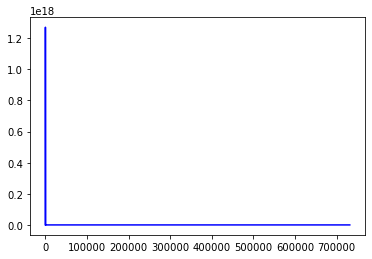

In [30]:
# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

training_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(dataset=training_set,batch_size=128)

n_epochs = 400 # or whatever
contador_custo = []

for epoch in range(n_epochs):

    for local_batch, local_labels in trainloader:
        
        y_hat = model(local_batch)
        loss = criterion(y_hat,local_labels)

        contador_custo.append(loss)
        print(f'Epoch: {epoch} Loss: {loss}')

        #backward pass (calcular gradientes)
        loss.backward()

        #update (atualizar os pesos)
        optimizer.step()

        #limpar o otimizador
        optimizer.zero_grad()
        
# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [ ]:
# Verificado resultados nos treinamentos e testes

In [31]:

"""#Fazer a predição teste"""
predicoes = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_test, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

print(len(df))
print(df['Correct'].sum())
print(df['Correct'].sum() / len(df))

234103
144161
0.6158015916071131


In [46]:
#234103
#143768
#0.6141228433638185

In [32]:
"""#Fazer a predição treinamento"""
predicoes = []
with torch.no_grad():
    for val in X_train:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_train, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

print(len(df))
print(df['Correct'].sum())
print(df['Correct'].sum() / len(df))

936408
576642
0.6158020862700874


In [1]:
# Resultado
#Utilizar menos colunas não mostrou muita melhora para o modelo